# LAB02 13/10

# DATASET POINT OF INTEREST es 2.1

In [1]:
import pandas as pd

In [7]:
df_POI = pd.read_csv('pois_all_info', sep='\t', low_memory=False)
df_NY = pd.read_csv('ny_municipality_pois_id.csv', sep=',', header=None)

In [8]:
df_POI

,@id,@type,@lat,@lon,amenity,name,shop,public_transport,highway
0,42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
1,42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
2,42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
3,42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
4,42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN
...,...,...,...,...,...,...,...,...,...
77879,600919896,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77880,600919898,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77881,600919900,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77882,600931232,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_NY

,0
0,42432939
1,42448838
2,42723103
3,42764076
4,42811266
...,...
53525,2553096114
53526,2553096138
53527,2553096143
53528,2553096154


In [10]:
df_POI_NW = pd.merge(df_POI, df_NY, left_on = "@id", right_on = 0)

In [11]:
df_POI_NW

,@id,@type,@lat,@lon,amenity,name,shop,public_transport,highway,0
0,42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN,42432939
1,42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN,42448838
2,42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN,42723103
3,42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN,42764076
4,42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN,42811266
...,...,...,...,...,...,...,...,...,...,...
53545,2553096114,node,40.736006,-73.713202,NaN,NaN,NaN,NaN,NaN,2553096114
53546,2553096138,node,40.736020,-73.713063,NaN,NaN,NaN,NaN,NaN,2553096138
53547,2553096143,node,40.736024,-73.713047,NaN,NaN,NaN,NaN,NaN,2553096143
53548,2553096154,node,40.736030,-73.713089,NaN,NaN,NaN,NaN,NaN,2553096154


In [15]:
df_POI_NW.drop(columns=0, inplace=True)
for key, value in df_POI_NW.dtypes.items():
    print(key, value)

@id int64
@type object
@lat float64
@lon float64
amenity object
name object
shop object
public_transport object
highway object


In [16]:
df_POI_NW.isna().sum(axis=0)

@id                     0
@type                   0
@lat                    0
@lon                    0
amenity             28838
name                23000
shop                44833
public_transport    45174
highway             45991
dtype: int64

In [19]:
amenity_types = df_POI_NW['amenity'].unique() # array
amenity_types

array([nan, 'ferry_terminal', 'drinking_water', 'toilets', 'fast_food',
       'grave_yard', 'school', 'place_of_worship', 'hospital',
       'university', 'social_facility', 'bicycle_parking', 'post_office',
       'restaurant', 'clinic', 'post_box', 'college',
       'research_institute', 'fountain', 'theatre', 'doctors',
       'arts_centre', 'cinema', 'bar', 'bench', 'embassy', 'courthouse',
       'community_centre', 'fire_station', 'library', 'kindergarten',
       'parking', 'public_building', 'dancing_school', 'police', 'prison',
       'townhall', 'pub', 'cafe', 'waste_basket', 'ice_cream',
       'veterinary', 'childcare', 'recycling', 'atm', 'telephone', 'fuel',
       'bank', 'marketplace', 'pharmacy', 'coworking_space', 'dentist',
       'motorcycle_parking', 'stripclub', 'bus_station', 'taxi',
       'parking_entrance', 'vending_machine', 'bbq', 'bureau_de_change',
       'car_rental', 'car_sharing', 'studio', 'nightclub', 'spa',
       'events_venue', 'bicycle_rental', '

In [25]:
n_amenities = (df_POI_NW['amenity'].dropna()).shape[0]
n_amenities 

24712

In [35]:
diz_amenity = {}
for i in df_POI_NW['amenity'].dropna():
    diz_amenity[i] = 0
for i in df_POI_NW['amenity']:
    for key, value in diz_amenity.items():
        if i == key:
            diz_amenity[key] +=1
for key, value in diz_amenity.items():
    diz_amenity[key] = value/n_amenities * 100
series_amenity = pd.Series(diz_amenity)
series_amenity

ferry_terminal       0.064746
drinking_water       3.488184
toilets              1.023794
fast_food            6.195371
grave_yard           0.169958
                       ...   
funeral_directors    0.004047
nail salon           0.004047
payment_centre       0.004047
graphic_design       0.004047
concert_hall         0.004047
Length: 119, dtype: float64

In [41]:
mask_threshold = series_amenity >= 1
series_amenity_thres = series_amenity[mask_threshold]
series_amenity_thres

drinking_water       3.488184
toilets              1.023794
fast_food            6.195371
school               3.690515
place_of_worship     4.095176
bicycle_parking     24.490126
restaurant          16.817740
post_box             4.422952
bar                  3.322273
bench                4.305601
cafe                 5.560052
bank                 2.658627
pharmacy             2.193266
bicycle_rental       1.825024
dtype: float64

Matplotlib is building the font cache; this may take a moment.


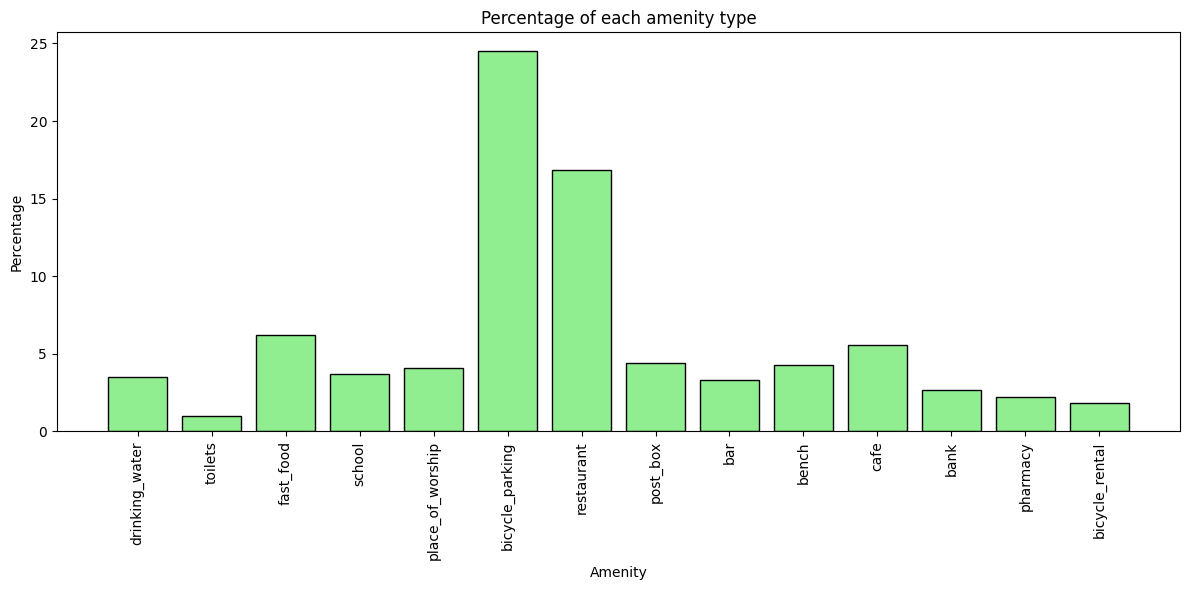

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(series_amenity_thres.index, series_amenity_thres.values, color='lightgreen', edgecolor='k')
plt.xticks(rotation=90)
plt.xlabel('Amenity')
plt.ylabel('Percentage')
plt.title('Percentage of each amenity type')
plt.tight_layout()
plt.show()

In [44]:
shop_types = df_POI_NW['shop'].unique()
shop_types

array([nan, 'car_repair', 'convenience', 'clothes', 'doityourself',
       'books', 'mall', 'supermarket', 'butcher', 'shoes', 'bed',
       'hairdresser', 'mobile_phone', 'alcohol', 'beauty', 'massage',
       'bakery', 'laundry', 'toys', 'bicycle', 'department_store',
       'homebrew', 'health_food', 'bridal', 'deli', 'car', 'jewelry',
       'stationery', 'confectionery', 'furniture', 'electronics',
       'variety_store', 'gift', 'greengrocer', 'craft', 'copyshop',
       'vacant', 'video_games', 'athletic', 'funeral_directors',
       'houseware', 'pet', 'florist', 'computer', 'creatures of comfort',
       'ice_cream', 'pop-kläder', 'art', 'garden_centre', 'dry_cleaning',
       'optician', 'yes', 'newsagent', 'seafood', 'outdoor', 'fishmonger',
       'hearing_aids', 'no', 'pastry', 'beverages', 'sports',
       'storage_units', 'music', 'hardware', 'photography', 'tailor',
       'mattress', 'shoe_repair', 'kiosk', 'Shag Shop', 'salon',
       'grocery', 'photo', 'hifi', 'nutr

In [45]:
n_shops = (df_POI_NW['shop'].dropna()).shape[0]
n_shops 

8717

In [47]:
diz_shop = {}
for i in df_POI_NW['shop'].dropna():
    diz_shop[i] = 0
for i in df_POI_NW['shop']:
    for key, value in diz_shop.items():
        if i == key:
            diz_shop[key] +=1
for key, value in diz_shop.items():
    diz_shop[key] = value/n_shops * 100
series_shop = pd.Series(diz_shop)
series_shop

car_repair           1.755191
convenience          9.647815
clothes              9.303660
doityourself         0.149134
books                1.227487
                       ...   
motorcycle_repair    0.022944
brewing_supplies     0.011472
coffee;tea           0.011472
wig                  0.011472
livestock            0.011472
Length: 191, dtype: float64

In [48]:
mask_threshold = series_shop >= 1
series_shop_thres = series_shop[mask_threshold]
series_shop_thres

car_repair          1.755191
convenience         9.647815
clothes             9.303660
books               1.227487
supermarket         6.366869
shoes               1.743719
hairdresser         5.586784
mobile_phone        2.799128
alcohol             4.680509
beauty              4.841115
bakery              3.693931
laundry             4.359298
bicycle             1.135712
department_store    1.078353
deli                5.299989
jewelry             1.112768
furniture           1.204543
variety_store       1.296318
gift                1.766663
dry_cleaning        2.604107
optician            1.261902
cosmetics           1.009522
dtype: float64

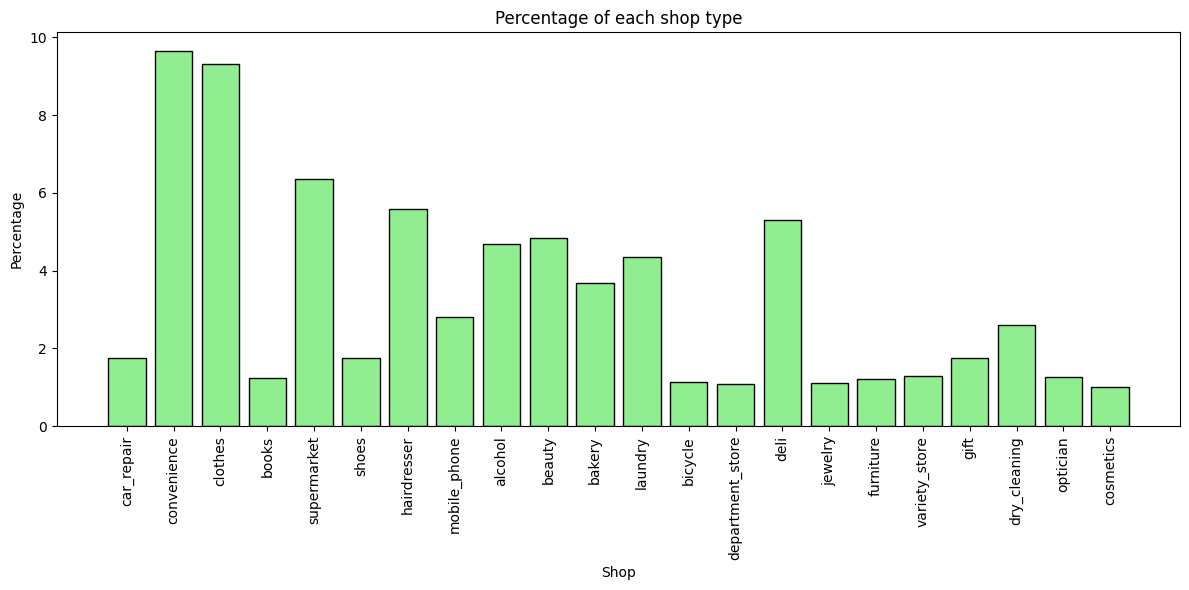

In [49]:
plt.figure(figsize=(12,6))
plt.bar(series_shop_thres.index, series_shop_thres.values, color='lightgreen', edgecolor='k')
plt.xticks(rotation=90)
plt.xlabel('Shop')
plt.ylabel('Percentage')
plt.title('Percentage of each shop type')
plt.tight_layout()
plt.show()

In [50]:
public_transport_types = df_POI_NW['public_transport'].unique()
public_transport_types

array(['stop_position', nan, 'platform', 'station', 'stop_area', 'stop'],
      dtype=object)

In [51]:
n_public_transport = (df_POI_NW['public_transport'].dropna()).shape[0]
n_public_transport

8376

In [60]:
diz_pTransport = {}
for i in df_POI_NW['public_transport'].dropna():
    diz_pTransport[i] = 0
for i in df_POI_NW['public_transport']:
    for key, value in diz_pTransport.items():
        if i == key:
            diz_pTransport[key] +=1
for key, value in diz_pTransport.items():
    diz_pTransport[key] = value/n_public_transport * 100
series_pTransport = pd.Series(diz_pTransport)
series_pTransport

stop_position    30.205349
platform         69.496180
station           0.191022
stop_area         0.095511
stop              0.011939
dtype: float64

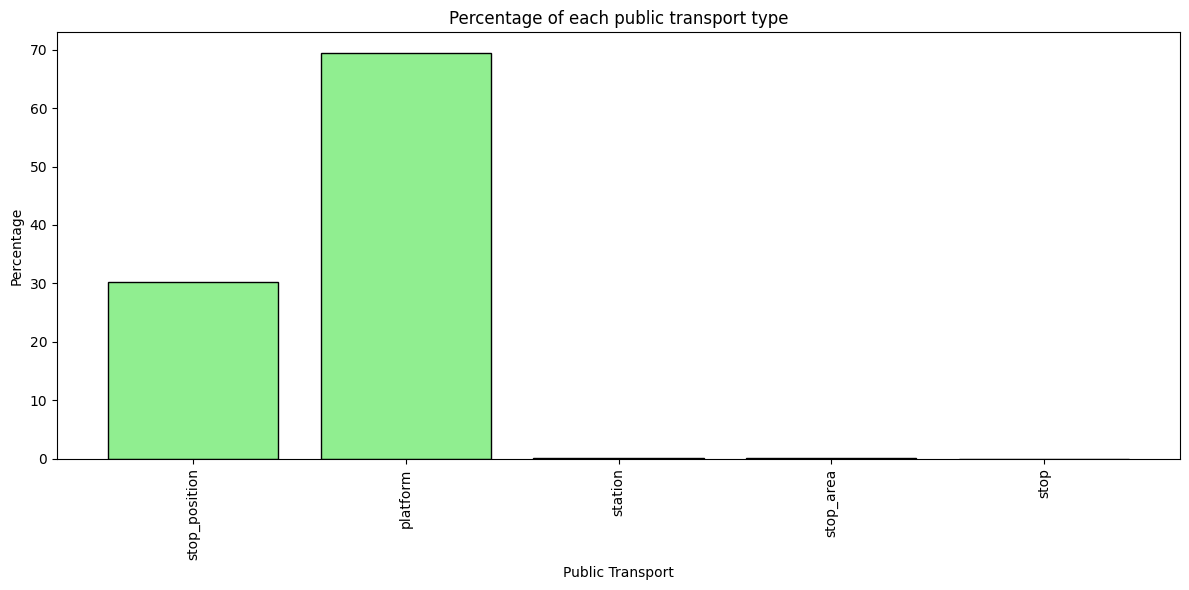

In [73]:
plt.figure(figsize=(12,6))
plt.bar(series_pTransport.index, series_pTransport.values, color='lightgreen', edgecolor='k')
plt.xticks(rotation=90)
plt.xlabel('Public Transport')
plt.ylabel('Percentage')
plt.title('Percentage of each public transport type')
plt.tight_layout()
plt.show()

In [63]:
highway_types = df_POI_NW['highway'].unique()
highway_types

array([nan, 'bus_stop', 'crossing'], dtype=object)

In [64]:
n_highway = (df_POI_NW['highway'].dropna()).shape[0]
n_highway

7559

In [65]:
diz_highway = {}
for i in df_POI_NW['highway'].dropna():
    diz_highway[i] = 0
for i in df_POI_NW['highway']:
    for key, value in diz_highway.items():
        if i == key:
            diz_highway[key] +=1
for key, value in diz_highway.items():
    diz_highway[key] = value/n_highway * 100
series_highway = pd.Series(diz_highway)
series_highway

bus_stop    99.986771
crossing     0.013229
dtype: float64

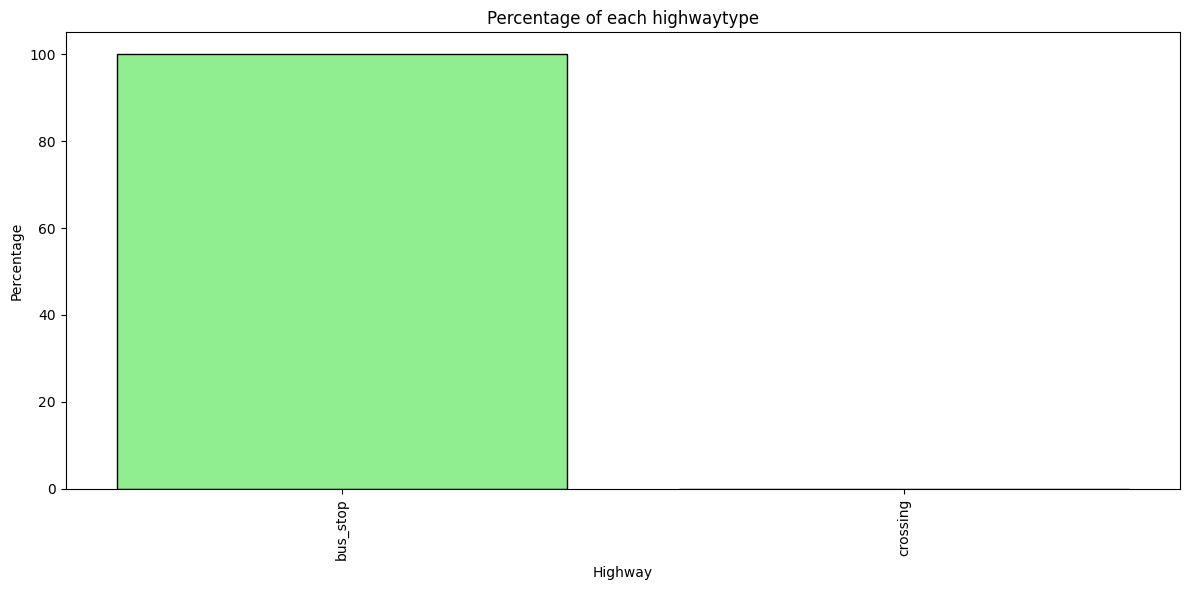

In [72]:
plt.figure(figsize=(12,6))
plt.bar(series_highway.index, series_highway.values, color='lightgreen', edgecolor='k')
plt.xticks(rotation=90)
plt.xlabel('Highway')
plt.ylabel('Percentage')
plt.title('Percentage of each highwaytype')
plt.tight_layout()
plt.show()